**Kehinde & Leticia Mini Hackathon**
- Identify use cases for convolutional neural networks and when they are used


Convolutional neural networks are generally used for image classification tasks

They are more **efficient** and provide better **performance** than simple, dense, feedforward neural networks.

To illustrate this, let's build a feedforward neural network for the MNIST Handwritten Digits dataset.

In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.math

#### Load Fashion MNIST data into train and test sets


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

#### Check shape of one image

In [5]:
## Checking one image in X_train
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
## Check the shape of that one image
X_train[0].shape

(28, 28)

#### Visualize the first image

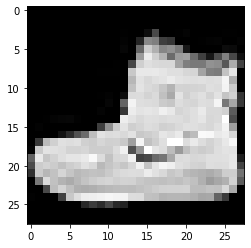

In [7]:
## Use plt.imshow() to plot an ndarray of pixels as an image
plt.imshow(X_train[0], cmap='gray');

In [8]:
## Check the corresponding label in y_train
y_train[0]

9

#### Ensure each value is a float before scaling


In [9]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.

X_train /= 255
X_test /= 255

In [11]:
## Check the shape of one image
X_train[0].shape

(28, 28)

In [12]:
## Check how many images are in the training set
X_train.shape

(60000, 28, 28)

In [13]:
# Reshape each image to be 28 x 28 x 1.
# The 1 corresponds to the one black/white value.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_train[0].shape

(28, 28, 1)

In [16]:
y_train[20:30]

array([3, 1, 4, 8, 4, 3, 0, 2, 4, 4], dtype=uint8)

In [17]:
## One-hot encode y_train using utils.to_categorical()
y_train_encoded = utils.to_categorical(y_train, 10)
y_test_encoded = utils.to_categorical(y_test, 10)

In [18]:
## Check what our encoded y_train looks like now
y_train_encoded[20:30]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:
X_train[0].shape

(28, 28, 1)

In [20]:
# Add an argument of number of layers to the function (and loop through it)


def model_func_deep(hidden_layers=2, hidden_neurons=8, dropout=None):
    model = Sequential()
    
    # This is taking our 28x28x1 pixel grid and flattening it to 784 input nodes
    model.add(Flatten(input_shape = X_train[0].shape))

    for layer in range(hidden_layers):
        # if layer == 0:  
        #     model.add(Dense(hidden_neurons, activation='relu', 
        #                     input_shape = X_train[0].shape))
        # else:
        model.add(Dense(hidden_neurons, activation='relu'))
            
        if dropout != None:
            model.add(Dropout(dropout))
    
    ## Output layer
    model.add(Dense(10, activation='softmax'))
    
    ## compile
    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    
    return model

In [21]:
# Parameters grid

params = {
    'hidden_layers': [2, 3, 4],
    'hidden_neurons': [32, 64],
    'dropout':[0, 0.2, 0.5],
    'epochs':[40, 80]
}

## Keras wrapper
nn = KerasClassifier(build_fn=model_func_deep, epochs = 10, batch_size=4096, verbose=0)

## GridSearchCV
gs_nn = GridSearchCV(nn, params,
                      cv=3, n_jobs=-1)

gs_nn.fit(X_train, y_train_encoded)

#Print results
print(gs_nn.best_score_)
print(gs_nn.best_params_)

C:\Users\Leticia\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Make predictions 
y_train_preds = gs_nn.predict(X_train)
y_test_preds = gs_nn.predict(X_test)

print(f'Training R2 Score: {metrics.r2_score(y_train_encoded, y_train_preds)}')
print(f'Test R2 Score: {metrics.r2_score(y_test_encoded, y_test_preds)}')

In [ ]:
preds_classes_1 = tensorflow.math.argmax(y_test_preds, axis=-1)

In [ ]:
#Print results
print(gs_nn.best_score_)
print(gs_nn.best_params_)

In [ ]:
# Save confusion matrix values
cm = confusion_matrix(y_test, preds_classes_1)
# tn, fp, fn, tp = cm.ravel()
cm

In [ ]:
# Display results in a confusion matrix (older method for sklearn < 1.0) - multiclass classification - 0 to 9 classes
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,8))
ConfusionMatrixDisplay.from_predictions(y_test, preds_classes_1, ax=ax);
# 1's show where predictions failed, diagonal is correct. 0's no error.

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test, preds_classes_1)))

In [ ]:
# When instantiating our model, what do we first write?
model1 = Sequential()

In [ ]:
# Parameters grid

params_2 = {
    'hidden_layers': [2],
    'hidden_neurons': [64, 128],
    'dropout':[0, 0.2, 0.5],
    'epochs':[80, 160]
}

## Keras wrapper
nn = KerasClassifier(build_fn=model_func_deep, epochs = 10, batch_size=4096, verbose=0)

## GridSearchCV
gs_nn_2 = GridSearchCV(nn, params_2,
                      cv=3, n_jobs=-1)

gs_nn_2.fit(X_train, y_train_encoded)

#Print results
print(gs_nn_2.best_score_)
print(gs_nn_2.best_params_)

In [ ]:
# Make predictions 
y_train_preds_2 = gs_nn_2.predict(X_train)
y_test_preds_2 = gs_nn_2.predict(X_test)

print(f'Training R2 Score: {metrics.r2_score(y_train_encoded, y_train_preds_2)}')
print(f'Test R2 Score: {metrics.r2_score(y_test_encoded, y_test_preds_2)}')

In [ ]:
preds_classes_2 = tensorflow.math.argmax(y_test_preds_2, axis=-1)

In [ ]:
#Print results
print(gs_nn_2.best_score_)
print(gs_nn_2.best_params_)

In [ ]:
# Save confusion matrix values
cm_2 = confusion_matrix(y_test, preds_classes_2)
# tn, fp, fn, tp = cm.ravel()
cm_2

In [ ]:
# Display results in a confusion matrix (older method for sklearn < 1.0) - multiclass classification - 0 to 9 classes
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,8))
ConfusionMatrixDisplay.from_predictions(y_test, preds_classes_2, ax=ax);
# 1's show where predictions failed, diagonal is correct. 0's no error.

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test, preds_classes_2)))

In [ ]:
model = Sequential()

#Filter
model.add(Conv2D(16,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = X_train[0].shape))
#Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, # number of filters
                     kernel_size = (3,3), # height/width of filter
                     activation = "relu")) # activation function

# dimensions of region of pooling
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten layer
model.add(Flatten())
# Input layer 1
model.add(Dense(128,
                activation = 'relu')) 
#droput layer
model.add(Dropout(0.2))

# second hidden layer
model.add(Dense(128,
                activation = 'relu'))

#dropout layer 2
model.add(Dropout(0.2))

#output layer
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

In [ ]:
## We'll use a batch_size of 4096 and 80 epochs
hist1 = model.fit(
    X_train,
    y_train_encoded, 
    batch_size=4096,
    validation_data=(X_test, y_test_encoded),
    epochs=80
    )

In [ ]:
hist1.history.keys()

In [ ]:
model.evaluate(X_test,y_test_encoded)

In [ ]:
y_train_preds_3 = model.predict(X_train)
y_test_preds_3 = model.predict(X_test)

print(f'Training R2 Score: {r2_score(y_train_encoded, y_train_preds_3)}')
print(f'Test R2 Score: {r2_score(y_test_encoded, y_test_preds_3)}')

In [ ]:
preds_classes_3 = tensorflow.math.argmax(y_test_preds_3, axis=-1)

In [ ]:
# Save confusion matrix values
cm_3 = confusion_matrix(y_test, preds_classes_3)
# tn, fp, fn, tp = cm.ravel()
cm_3

In [ ]:
# Display results in a confusion matrix (older method for sklearn < 1.0) - multiclass classification - 0 to 9 classes
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,8))
ConfusionMatrixDisplay.from_predictions(y_test, preds_classes_3, ax=ax);
# 1's show where predictions failed, diagonal is correct. 0's no error.

In [ ]:
def plot_hist(hist, metric = "loss"):
    """ plot the results from neural net training 
    
    Args:
        hist (TF history object): The history of the training
        metric (string): The name of the metric to plot (name should be the same as key in hist.history)
    
    Returns: 
        None
    """
    
    plt.figure(figsize=(12, 8))

    plt.plot(hist.history[metric], label=f'Train {metric.capitalize()}')
    plt.plot(hist.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')

    plt.title(f'Training & Testing {metric.capitalize()} by Epoch', fontsize=25)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel(metric.capitalize(), fontsize=18)

    plt.legend(fontsize=18);

In [ ]:
plot_hist(hist1, "loss")

In [ ]:
plot_hist(hist1, "accuracy")

In [ ]:
plot_hist(hist1)

In [ ]:
plot_hist(hist1, metric = "accuracy")

In [ ]:
model_2 = Sequential()

#Filter
model_2.add(Conv2D(16,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape = X_train[0].shape))
#Pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(32, # number of filters
                     kernel_size = (3,3), # height/width of filter
                     activation = "relu")) # activation function

# dimensions of region of pooling
model_2.add(MaxPooling2D(pool_size = (2,2)))

#flatten layer
model_2.add(Flatten())
# Input layer 1
model_2.add(Dense(128,
                activation = 'relu',
                kernel_regularizer=l2(0.01))) 
#droput layer
model_2.add(Dropout(0.2))

# second hidden layer
model_2.add(Dense(128,
                activation = 'relu',
                kernel_regularizer=l2(0.01)))

#dropout layer 2
model_2.add(Dropout(0.2))

#output layer
model_2.add(Dense(10, activation = "softmax"))

In [ ]:
model_2.summary()

In [ ]:
model_2.compile(loss = 'categorical_crossentropy',
                 optimizer = 'adam',
                 metrics = ['accuracy'])

In [ ]:
## Early Stopping
early_stop = EarlyStopping(patience = 5, min_delta = 0.001,
                           restore_best_weights=True)

In [ ]:
## We'll use a batch_size of 4096 and 80 epochs
hist2 = model_2.fit(
    X_train,
    y_train_encoded, 
    batch_size=4096,
    validation_data=(X_test, y_test_encoded),
    epochs=80,
    callbacks = [early_stop]
    )

In [ ]:
hist2.history.keys()

In [ ]:
model_2.evaluate(X_test,y_test_encoded)

In [ ]:
y_train_preds_4 = model_2.predict(X_train)
y_test_preds_4 = model_2.predict(X_test)

print(f'Training R2 Score: {r2_score(y_train_encoded, y_train_preds_4)}')
print(f'Test R2 Score: {r2_score(y_test_encoded, y_test_preds_4)}')

In [ ]:
preds_classes_4 = tensorflow.math.argmax(y_test_preds_4, axis=-1)

In [ ]:
# Save confusion matrix values
cm_4 = confusion_matrix(y_test, preds_classes_4)
# tn, fp, fn, tp = cm.ravel()
cm_4

In [ ]:
# Display results in a confusion matrix (older method for sklearn < 1.0) - multiclass classification - 0 to 9 classes
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize = (10,8))
ConfusionMatrixDisplay.from_predictions(y_test, preds_classes_4, ax=ax);
# 1's show where predictions failed, diagonal is correct. 0's no error.

In [ ]:
plot_hist(hist2, "loss")

In [ ]:
plot_hist(hist2, "accuracy")

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test, preds_classes_4)))

In [ ]:
## Model Comparison

In [ ]:
print(f'Training RMSE: {mean_squared_error(y_train_encoded, y_train_preds_4, squared=False)}')
print(f'Test RMSE: {mean_squared_error(y_test_encoded, y_test_preds_4, squared=False)}')

In [ ]:
print(f'Training R2 Score: {r2_score(y_train_encoded, y_train_preds_3)}')
print(f'Test R2 Score: {r2_score(y_test_encoded, y_test_preds_3)}')

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test, preds_classes_3)))

In [ ]:
print('Accuracy Score : ' + str(accuracy_score(y_test, preds_classes_4)))